# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla_{}Q(w) = 2X^T \left( Xw -y\right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

from descents import get_descent
from linear_regression import LinearRegression

In [6]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [7]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[
        0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[
        0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [8]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(descent_config=descent_config,
                              tolerance=tolerance,
                              max_iter=max_iter)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.base import BaseEstimator, TransformerMixin
from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [10]:
data = pd.read_csv('/kaggle/input/autosss/autos.csv')

In [11]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [12]:
categorical = []
numeric = []
other = []

# YOUR CODE (EDA):

*  Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

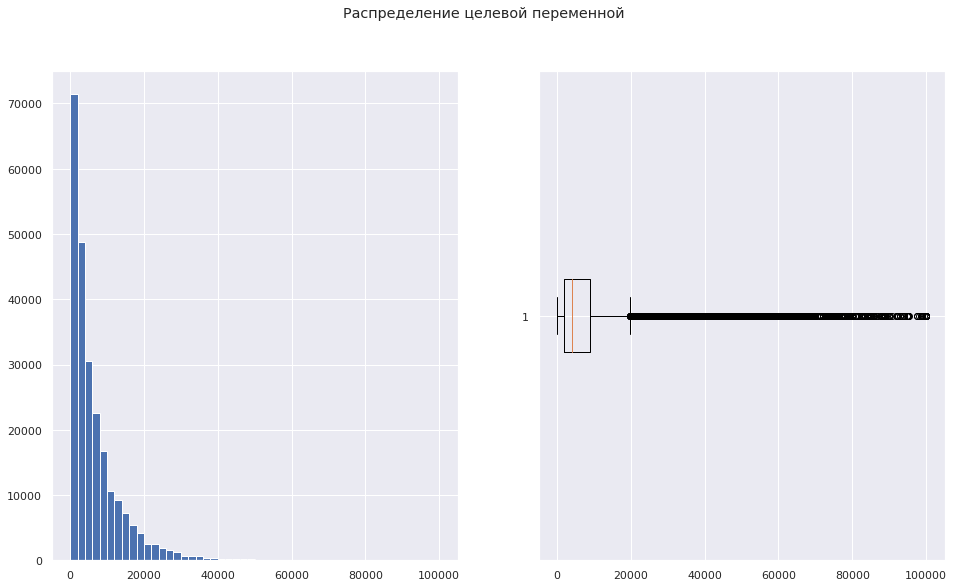

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle('Распределение целевой переменной')
ax1.hist(data['price'], bins=50)
ax2.boxplot(data['price'], vert=False)
plt.show()

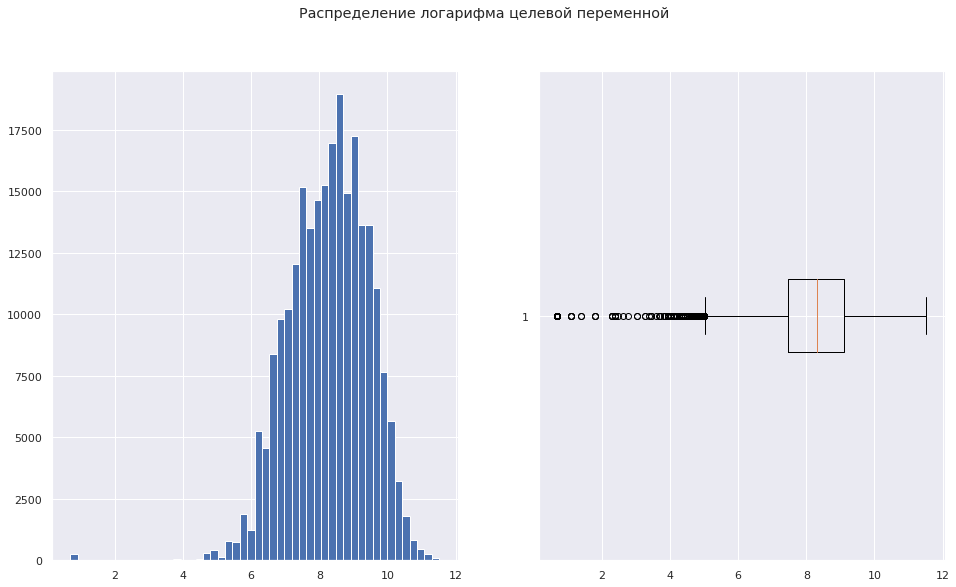

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle('Распределение логарифма целевой переменной')
ax1.hist(np.log1p(data['price']), bins=50)
ax2.boxplot(np.log1p(data['price']), vert=False)
plt.show()

Обучил регрессию на прогнозирование целевой переменной и на прогнозирование логарифма, лучшее качество по метрике R2 было при прогнозировании исходной переменной

Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;

In [15]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

In [16]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


In [17]:
data.describe(include='object')

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage
count,241190,241190,241190,241190,241190,241190
unique,38,249,8,2,7,2
top,volkswagen,golf,limousine,manuell,benzin,nein
freq,49087,20071,72515,183620,153612,217613


In [18]:
# бинарный признак
other = ['notRepairedDamage', 'gearbox']
# категориальные
categorical = data.dtypes[data.dtypes == 'object'].index.tolist()
categorical = [c for c in categorical if c not in other]
# числовые
numeric = [
    c for c in data.columns if c not in other and c not in categorical
    and c != 'price' and c != 'price_log'
]

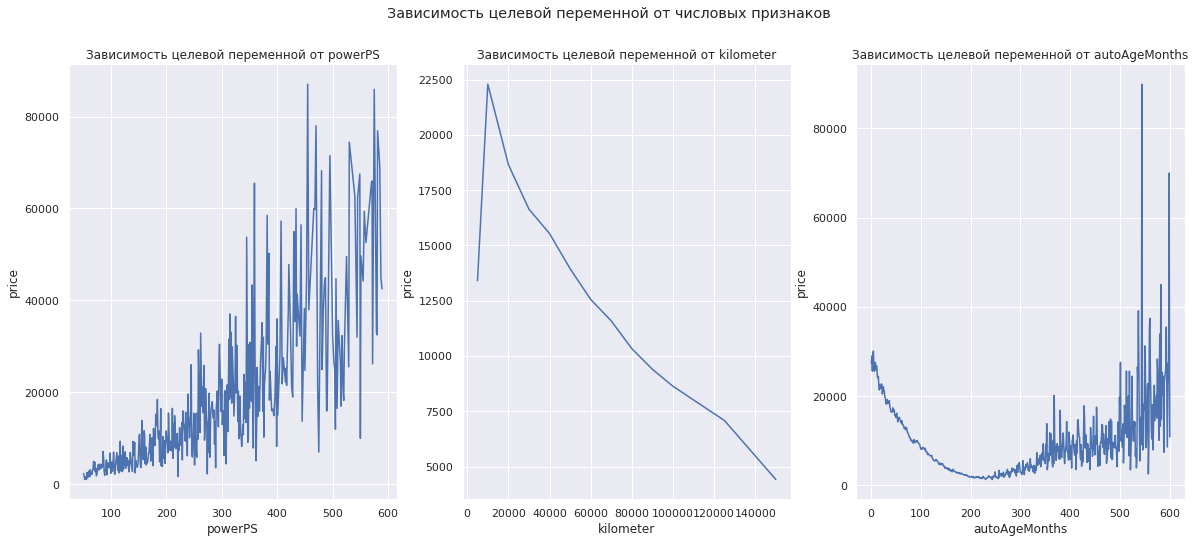

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Зависимость целевой переменной от числовых признаков')
for i in range(len(numeric)):
    sns.lineplot(x=numeric[i],
                 y='price',
                 data=data,
                 ax=axes[i],
                 err_style=None)
    axes[i].set_title(f'Зависимость целевой переменной от {numeric[i]}')
plt.show()

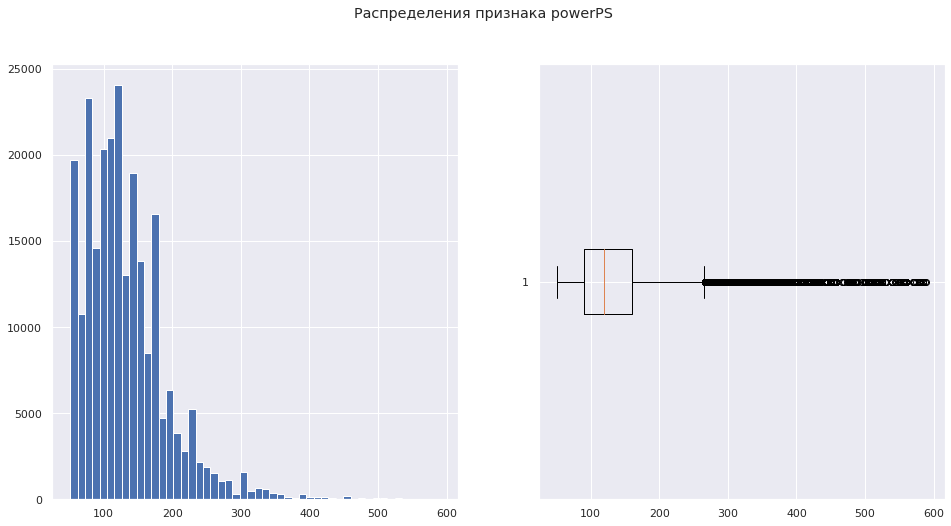

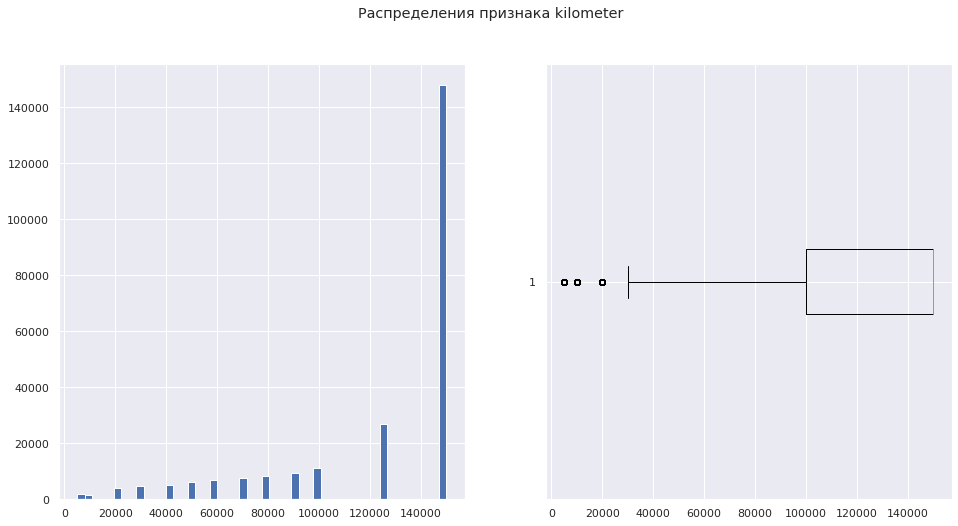

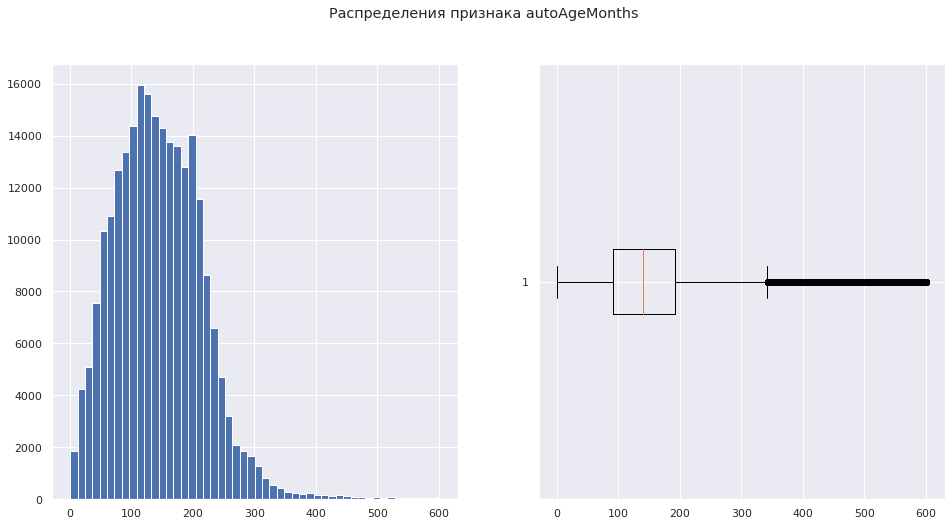

In [20]:
for feat in numeric:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle(f'Распределения признака {feat}')
    axes[0].hist(data[feat], bins=50)
    axes[1].boxplot(data[feat], vert=False)
    plt.show()

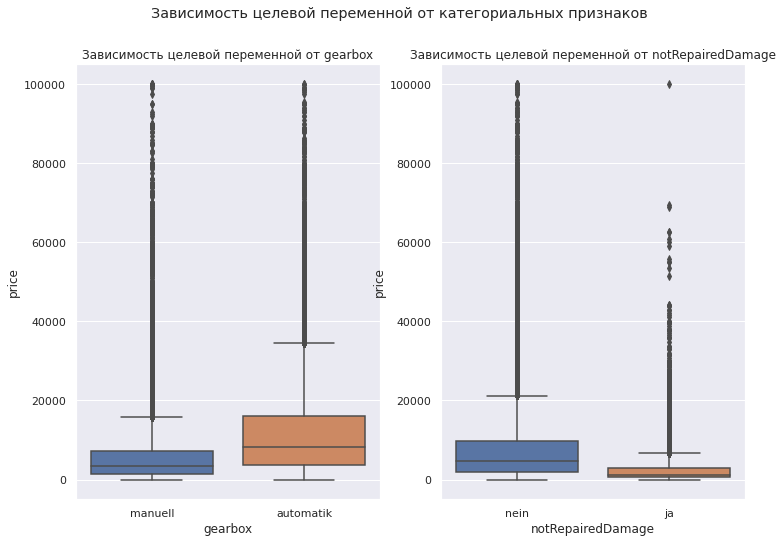

In [21]:
binary = ['gearbox', 'notRepairedDamage']
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Зависимость целевой переменной от категориальных признаков')
for i in range(len(binary)):
    sns.boxplot(x=binary[i], y='price', data=data, ax=axes[i])
    axes[i].set_title(f'Зависимость целевой переменной от {binary[i]}')
plt.show()

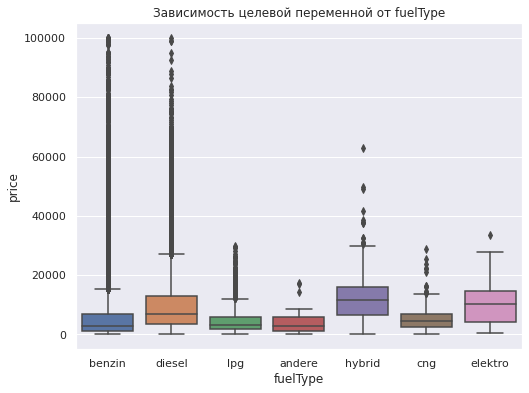

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fuelType', y='price', data=data)
plt.title('Зависимость целевой переменной от fuelType')
plt.show()

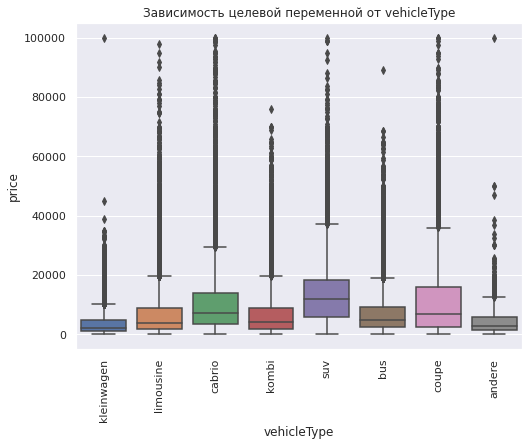

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='vehicleType', y='price', data=data)
plt.title('Зависимость целевой переменной от vehicleType')
plt.xticks(rotation='vertical')
plt.show()

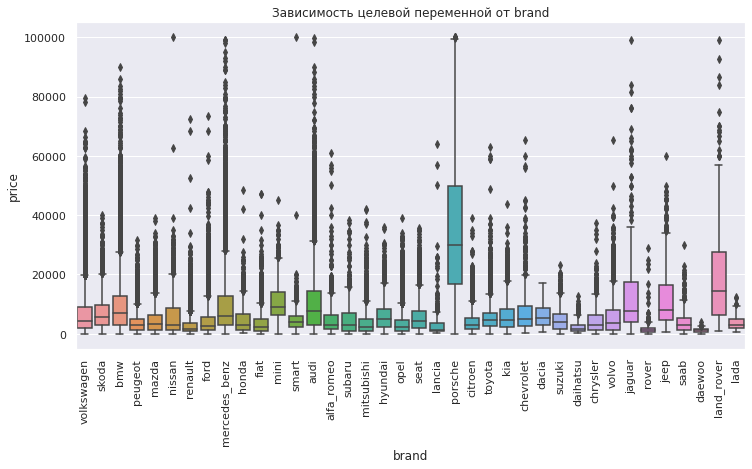

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=data)
plt.title('Зависимость целевой переменной от brand')
plt.xticks(rotation='vertical')
plt.show()

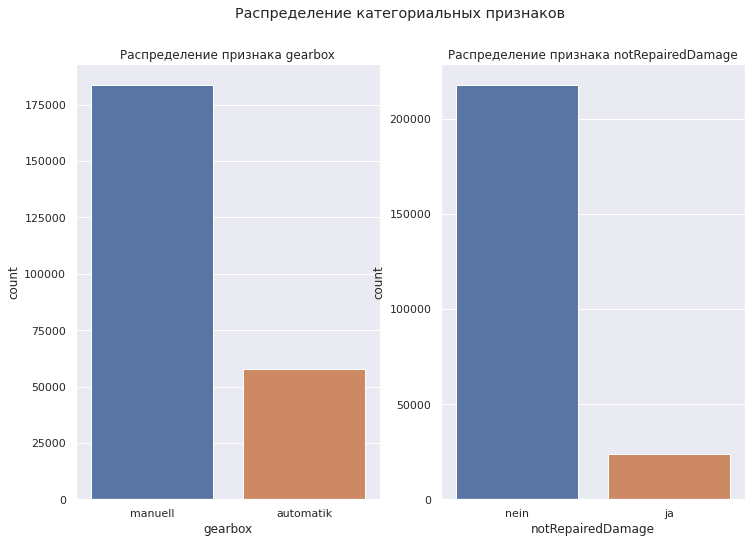

In [25]:
binary = ['gearbox', 'notRepairedDamage']
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Распределение категориальных признаков')
for i in range(len(binary)):
    sns.countplot(x=binary[i], data=data, ax=axes[i])
    axes[i].set_title(f'Распределение признака {binary[i]}')
plt.show()

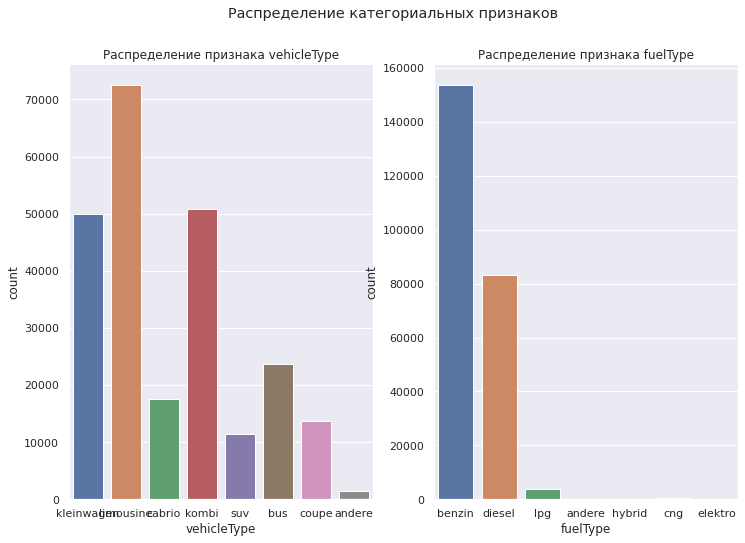

In [26]:
cat = ['vehicleType', 'fuelType']
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Распределение категориальных признаков')
for i in range(len(cat)):
    sns.countplot(x=cat[i], data=data, ax=axes[i])
    axes[i].set_title(f'Распределение признака {cat[i]}')
plt.show()

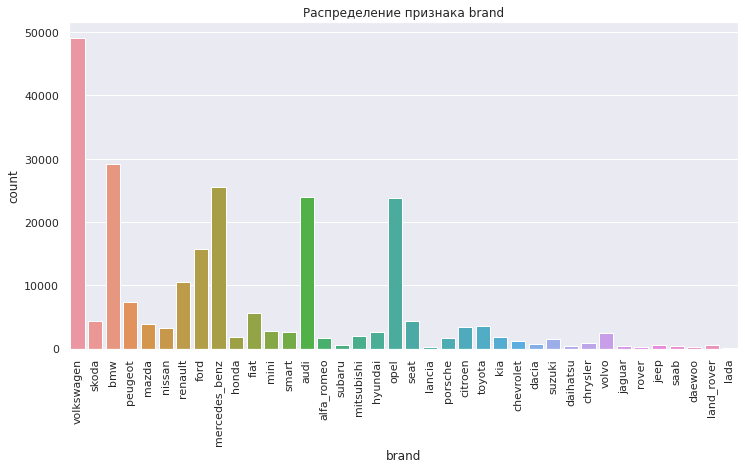

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='brand', data=data)
plt.title(f'Распределение признака brand')
plt.xticks(rotation='vertical')
plt.show()

In [28]:
data['notRepairedDamage'] = data['notRepairedDamage'].map({'ja': 1, 'nein': 0})
data['gearbox'] = data['gearbox'].map({'automatik': 1, 'manuell': 0})

In [29]:
class OneHotTopTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, category, treshold):
        self.treshold = treshold
        self.category = category
        self.top_cats = []

    def fit(self, df):
        self.top_cats = df[
            self.category].value_counts()[lambda x: x > self.treshold].index

    def transform(self, X):
        df = X.copy()
        df[self.category] = np.where(df[self.category].isin(self.top_cats),
                                     df[self.category], 'another')
        return df

    def fit_transform(self, df):
        self.fit(df)
        df = self.transform(df)
        return df

In [30]:
ohe_top = OneHotTopTransformer('model', 1000)
data = ohe_top.fit_transform(data)

ohe_top = OneHotTopTransformer('brand', 1000)
data = ohe_top.fit_transform(data)

In [31]:
data['bias'] = 1
other += ['bias']

data = shuffle(data, random_state=42)
x = data[categorical + numeric + other]
y = data['price'].values

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric), ('other', 'passthrough', other)
])

x = column_transformer.fit_transform(x).toarray()

In [33]:
# YOUR CODE (data split into train/val/test):
from sklearn.utils import shuffle

val_size = x.shape[0] // 10
X_train = x[:val_size * 8]
y_train = y[:val_size * 8]

X_val = x[val_size * 8:val_size * 9]
y_val = y[val_size * 8:val_size * 9]

X_test = x[val_size * 9:]
y_test = y[val_size * 9:]

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [34]:
mean_squared_error(y_val, [y_val.mean()] * len(y_val), squared=False)

8299.898399887581

In [35]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0
    }
}

best_loss_info = {
    'full': {
        'loss': np.inf,
        'lambda_': 0
    },
    'stochastic': {
        'loss': np.inf,
        'lambda_': 0
    },
    'momentum': {
        'loss': np.inf,
        'lambda_': 0
    },
    'adam': {
        'loss': np.inf,
        'lambda_': 0
    },
}

lambdas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

In [36]:
for descent in descent_names:
    descent_config['descent_name'] = descent
    print('#' * 15, descent, '#' * 15)
    for lambda_ in lambdas:
        if descent != 'adam' and lambda_ > 1:
            break
        descent_config['kwargs']['lambda_'] = lambda_
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        loss = np.sqrt(model.calc_loss(X_val, y_val))
        if loss < best_loss_info[descent]['loss']:
            best_loss_info[descent]['loss'] = loss
            best_loss_info[descent]['lambda_'] = lambda_

        print(f"lambda: {lambda_} loss : {loss:.5f}")

############### full ###############
lambda: 0.001 loss : 9987.20272
lambda: 0.01 loss : 6195.75261
lambda: 0.1 loss : 5009.57906
lambda: 1 loss : 4747.83604
############### stochastic ###############
lambda: 0.001 loss : 10004.76927
lambda: 0.01 loss : 6234.37911
lambda: 0.1 loss : 5019.33002
lambda: 1 loss : 4858.67847
############### momentum ###############
lambda: 0.001 loss : 6150.65300
lambda: 0.01 loss : 5007.67752
lambda: 0.1 loss : 4747.63590
lambda: 1 loss : 4565.32388
############### adam ###############
lambda: 0.001 loss : 10841.79023
lambda: 0.01 loss : 10841.06082
lambda: 0.1 loss : 10826.08645
lambda: 1 loss : 10691.20264
lambda: 10.0 loss : 9434.81066
lambda: 100.0 loss : 5090.87319
lambda: 1000.0 loss : 4565.55459


In [37]:
losses = {'full': [], 'stochastic': [], 'momentum': [], 'adam': []}

descent_result = pd.DataFrame(columns=[
    'train_rmse', 'valid_rmse', 'test_rmse', 'train_r2', 'valid_r2', 'test_r2',
    'time'
],
                              index=losses.keys())

In [38]:
for descent in descent_names:
    descent_config['descent_name'] = descent
    descent_config['kwargs']['lambda_'] = best_loss_info[descent]['lambda_']
    model = LinearRegression(descent_config=descent_config)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    losses[descent] = model.loss_history

    train_loss = mean_squared_error(y_train, train_preds, squared=False)
    valid_loss = mean_squared_error(y_val, val_preds, squared=False)
    test_loss = mean_squared_error(y_test, test_preds, squared=False)

    train_metric = r2_score(y_train, train_preds)
    valid_metric = r2_score(y_val, val_preds)
    test_metric = r2_score(y_test, test_preds)

    descent_result.loc[descent, :] = [
        train_loss, valid_loss, test_loss, train_metric, valid_metric,
        test_metric, end - start
    ]
    print('#' * 15, descent, '#' * 15)
    print(
        f"train loss: {train_loss:.5f} valid loss : {valid_loss:.5f} test loss {test_loss:.5f}"
    )
    print(
        f"train metric: {train_metric:.5f} valid metric : {valid_metric:.5f} test metric {test_metric:.5f}"
    )

############### full ###############
train loss: 4494.11585 valid loss : 4747.84401 test loss 4499.39531
train metric: 0.68446 valid metric : 0.67277 test metric 0.67842
############### stochastic ###############
train loss: 4504.06735 valid loss : 4746.28000 test loss 4508.00692
train metric: 0.68306 valid metric : 0.67299 test metric 0.67719
############### momentum ###############
train loss: 4336.88082 valid loss : 4565.32386 test loss 4375.49608
train metric: 0.70615 valid metric : 0.69745 test metric 0.69589
############### adam ###############
train loss: 4336.62128 valid loss : 4565.55446 test loss 4374.44759
train metric: 0.70619 valid metric : 0.69742 test metric 0.69604


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

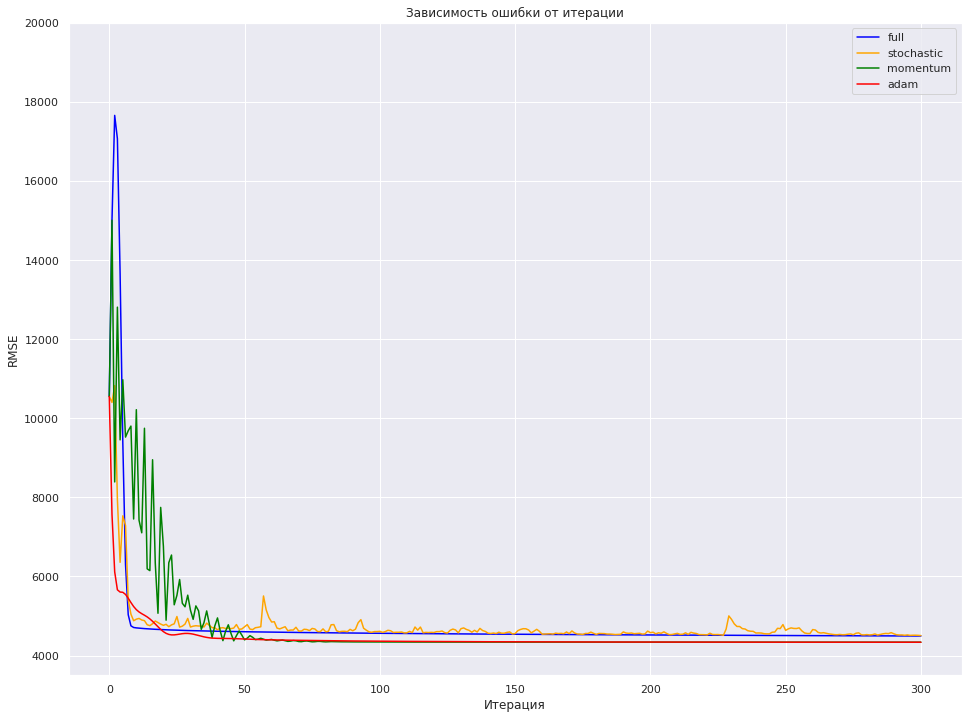

In [39]:
colors = ['blue', 'orange', 'green', 'red']
plt.figure(figsize=(16, 12))
x = range(model.max_iter + 1)
for color, descent in zip(colors, losses):
    plt.plot(x, np.sqrt(losses[descent]), color=color, label=descent)
plt.ylim(3500, 20000)
plt.xlabel('Итерация')
plt.ylabel('RMSE')
plt.title('Зависимость ошибки от итерации')
plt.legend()
plt.show()

In [40]:
descent_result.sort_values(by='test_r2', ascending=False)

,train_rmse,valid_rmse,test_rmse,train_r2,valid_r2,test_r2,time
adam,4336.621278,4565.554461,4374.447589,0.706187,0.697419,0.696036,9.993143
momentum,4336.880816,4565.323855,4375.496082,0.706152,0.69745,0.69589,10.721705
full,4494.115851,4747.844009,4499.395313,0.684459,0.672774,0.678423,10.237157
stochastic,4504.067346,4746.279999,4508.006919,0.68306,0.67299,0.677191,2.511798


* Обычный градиентный спуск сходится быстрее всех, однако по качеству занимает предпоследнее место после стохастического спуска. Время обучения - самое большое из рассмотренных
* Стохастический градиентный спуск сходится быстрее всех, однако заметны скачки, связанные с тем, что минимизации ошибки по подножеству аргументов не всегда приводит к минимизации ошибки по всем аргументам. Качество при это самое худшее из рассмотренных
* Momentum немного уступает adam во времени по итерациям и качестве. Сходится так же, как и adam
* Adam показывает лучшее качество, при этом по времени по итерациям занимает второе место после стохастического

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [41]:
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': best_loss_info['stochastic']['lambda_'],
        'batch_size': 50,
    }
}

In [42]:
model = LinearRegression(descent_config=descent_config)
model.fit(X_train, y_train)

In [43]:
"""
поскольку большинство весов в диапазоне 100-10000,
поменяем tolerance c 4e-4 еа 4e4, поскольку при таком масштабе весов
вряд ли получится сделать квадрат евклидовой нормы разности весов меньше 4e-4
"""
model.descent.w

array([-3.10175693e+02, -8.81892284e+02,  2.05622941e+03,  7.72132744e+02,
       -8.72647503e+02, -6.91013114e+02, -5.22960198e+02, -1.12467201e+02,
        1.01386725e+02, -9.72947513e+02, -7.96954624e+02, -6.29947488e+02,
        1.27180521e+03,  4.24004279e+02, -4.26852724e+02, -1.78784960e+02,
       -3.93427584e+02, -6.22235907e+02,  6.78030793e+03, -5.38449019e+02,
       -2.94763454e+02,  5.31610104e+02, -4.55487214e+02, -2.02021200e+02,
       -1.69022798e+02,  1.71125127e+03, -1.10013150e+02,  5.92708822e+02,
       -3.29901934e+02,  4.53809605e+02, -4.35083875e+02, -1.16424124e+03,
        9.09170577e+00, -4.55790108e+02, -8.94153750e+02, -7.58129093e+01,
        8.41728534e+02,  7.90774923e+02,  6.62188807e+02, -4.16054875e+02,
        5.31646401e+02,  1.00878920e+02, -7.25268923e+02,  1.77937432e+02,
        1.07622933e+03, -1.54944918e+02,  1.75319023e+01,  3.52032752e+02,
        1.98723780e+02, -3.80437345e+02,  2.10959392e+02, -2.13748855e+02,
       -7.48583530e+02,  

In [44]:
batch_sizes = np.arange(5, 500, 10)
batch_times = []
batch_iterations = []
for batch_size in batch_sizes:
    descent_config['kwargs']['batch_size'] = batch_size
    iter_time = []
    num_iterations = []
    for _ in range(10):
        start = time.time()
        model = LinearRegression(descent_config=descent_config, tolerance=4e4)
        model.fit(X_train, y_train)
        end = time.time()

        iter_time.append(end - start)
        num_iterations.append(len(model.loss_history) - 1)

    batch_iterations.append(int(np.mean(num_iterations)))
    batch_times.append(np.mean(iter_time))

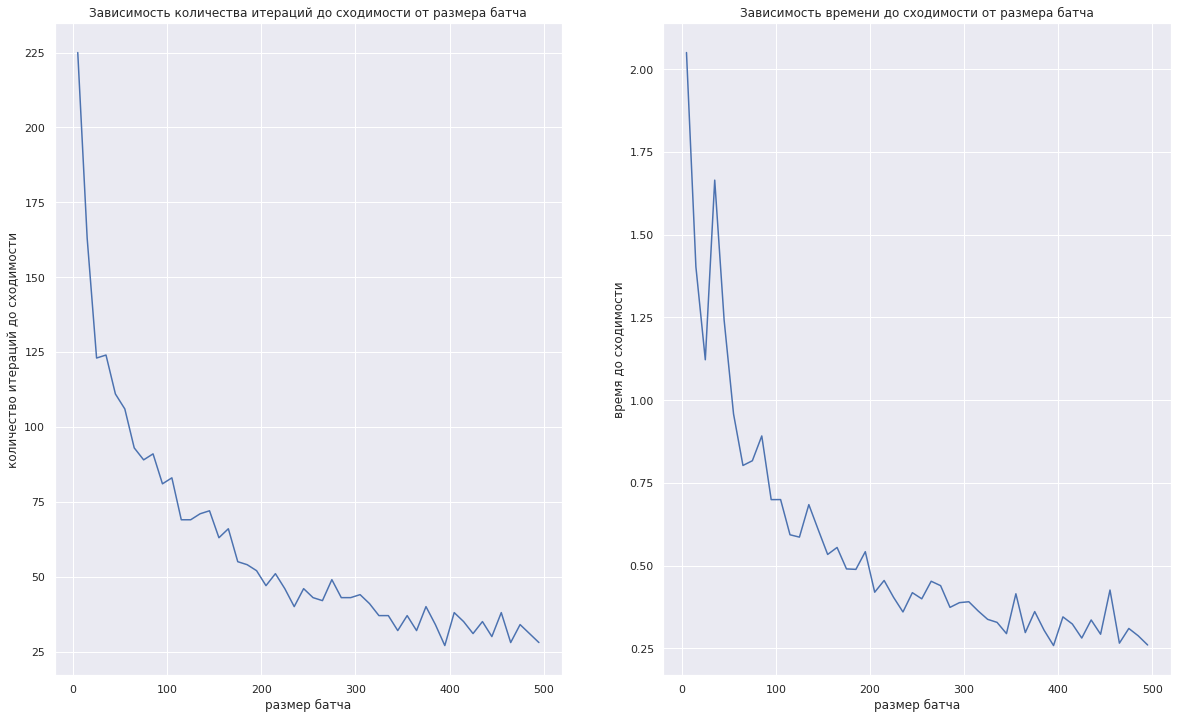

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20, 12))
ax[0].plot(batch_sizes, batch_iterations)
ax[0].set_xlabel('размер батча')
ax[0].set_ylabel('количество итераций до сходимости')
ax[0].set_title(
    'Зависимость количества итераций до сходимости от размера батча')
ax[1].plot(batch_sizes, batch_times)
ax[1].set_xlabel('размер батча')
ax[1].set_ylabel('время до сходимости')
ax[1].set_title('Зависимость времени до сходимости от размера батча')
plt.show()

Видим, что чем больше размер батча, тем меньшее количество итераций требуется до сходимости, а следовательно, и меньшее время

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [46]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 0,
        'mu': 0
    }
}

best_loss_reg_info = {
    'full': {
        'loss': np.inf,
        'lambda_': 0,
        'mu': 0
    },
    'stochastic': {
        'loss': np.inf,
        'lambda_': 0,
        'mu': 0
    },
    'momentum': {
        'loss': np.inf,
        'lambda_': 0,
        'mu': 0
    },
    'adam': {
        'loss': np.inf,
        'lambda_': 0,
        'mu': 0
    },
}

lambdas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
reg_coef = [1e-3, 1e-2, 1e-1, 1, 1e1]

In [47]:
for descent in descent_names:
    descent_config['descent_name'] = descent
    print('#' * 15, descent, '#' * 15)
    for lambda_ in lambdas:
        if descent != 'adam' and lambda_ > 1:
            break
        descent_config['kwargs']['lambda_'] = lambda_
        for mu in reg_coef:
            descent_config['kwargs']['mu'] = mu
            model = LinearRegression(descent_config=descent_config)
            model.fit(X_train, y_train)
            loss = np.sqrt(model.calc_loss(X_val, y_val))
            if loss < best_loss_reg_info[descent]['loss']:
                best_loss_reg_info[descent]['loss'] = loss
                best_loss_reg_info[descent]['lambda_'] = lambda_
                best_loss_reg_info[descent]['mu'] = mu

            print(f"lambda: {lambda_}, mu: {mu} loss : {loss:.5f}")

############### full ###############
lambda: 0.001, mu: 0.001 loss : 9987.98698
lambda: 0.001, mu: 0.01 loss : 9987.58144
lambda: 0.001, mu: 0.1 loss : 9987.56790
lambda: 0.001, mu: 1 loss : 9987.87108
lambda: 0.001, mu: 10.0 loss : 9987.75198
lambda: 0.01, mu: 0.001 loss : 6195.78169
lambda: 0.01, mu: 0.01 loss : 6195.72254
lambda: 0.01, mu: 0.1 loss : 6195.76288
lambda: 0.01, mu: 1 loss : 6195.84859
lambda: 0.01, mu: 10.0 loss : 6195.83280
lambda: 0.1, mu: 0.001 loss : 5009.59448
lambda: 0.1, mu: 0.01 loss : 5009.58696
lambda: 0.1, mu: 0.1 loss : 5009.57409
lambda: 0.1, mu: 1 loss : 5009.61013
lambda: 0.1, mu: 10.0 loss : 5009.58290
lambda: 1, mu: 0.001 loss : 4747.85199
lambda: 1, mu: 0.01 loss : 4747.83772
lambda: 1, mu: 0.1 loss : 4747.83753
lambda: 1, mu: 1 loss : 4747.84284
lambda: 1, mu: 10.0 loss : 4747.84347
############### stochastic ###############
lambda: 0.001, mu: 0.001 loss : 10026.02564
lambda: 0.001, mu: 0.01 loss : 9987.47629
lambda: 0.001, mu: 0.1 loss : 9982.93479


In [48]:
reg_losses = {'full': [], 'stochastic': [], 'momentum': [], 'adam': []}

reg_descent_result = pd.DataFrame(columns=[
    'train_rmse', 'valid_rmse', 'test_rmse', 'train_r2', 'valid_r2', 'test_r2',
    'time'
],
                                  index=losses.keys())

In [49]:
for descent in descent_names:
    descent_config['descent_name'] = descent
    lambda_ = best_loss_reg_info[descent]['lambda_']
    mu = best_loss_reg_info[descent]['mu']
    descent_config['kwargs']['lambda_'] = lambda_
    descent_config['kwargs']['mu'] = mu

    model = LinearRegression(descent_config=descent_config)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    reg_losses[descent] = model.loss_history

    train_loss = mean_squared_error(y_train, train_preds, squared=False)
    valid_loss = mean_squared_error(y_val, val_preds, squared=False)
    test_loss = mean_squared_error(y_test, test_preds, squared=False)

    train_metric = r2_score(y_train, train_preds)
    valid_metric = r2_score(y_val, val_preds)
    test_metric = r2_score(y_test, test_preds)

    reg_descent_result.loc[descent, :] = [
        train_loss, valid_loss, test_loss, train_metric, valid_metric,
        test_metric, end - start
    ]
    print('#' * 10,
          f"{descent} with regularization; lambda: {lambda_}, mu: {mu}",
          '#' * 10)
    print(
        f"train loss: {train_loss:.5f} valid loss : {valid_loss:.5f} test loss {test_loss:.5f}"
    )
    print(
        f"train metric: {train_metric:.5f} valid metric : {valid_metric:.5f} test metric {test_metric:.5f}"
    )

########## full with regularization; lambda: 1, mu: 0.1 ##########
train loss: 4494.11731 valid loss : 4747.84585 test loss 4499.39561
train metric: 0.68446 valid metric : 0.67277 test metric 0.67842
########## stochastic with regularization; lambda: 1, mu: 0.1 ##########
train loss: 4552.30833 valid loss : 4797.08351 test loss 4554.23258
train metric: 0.67623 valid metric : 0.66595 test metric 0.67054
########## momentum with regularization; lambda: 1, mu: 0.01 ##########
train loss: 4336.88079 valid loss : 4565.32381 test loss 4375.49606
train metric: 0.70615 valid metric : 0.69745 test metric 0.69589
########## adam with regularization; lambda: 1000.0, mu: 0.01 ##########
train loss: 4336.62133 valid loss : 4565.55484 test loss 4374.44749
train metric: 0.70619 valid metric : 0.69742 test metric 0.69604


In [50]:
print('Результаты с регуляризацией')
display(reg_descent_result.sort_values(by='test_r2', ascending=False))
print('Результаты без регуляризации')
display(descent_result.sort_values(by='test_r2', ascending=False))

Результаты с регуляризацией


,train_rmse,valid_rmse,test_rmse,train_r2,valid_r2,test_r2,time
adam,4336.621333,4565.554841,4374.447485,0.706187,0.697419,0.696036,10.66089
momentum,4336.880786,4565.323814,4375.496061,0.706152,0.69745,0.69589,10.281722
full,4494.117313,4747.845852,4499.39561,0.684459,0.672774,0.678423,9.464433
stochastic,4552.30833,4797.08351,4554.232578,0.676234,0.665952,0.670537,2.574222


Результаты без регуляризации


,train_rmse,valid_rmse,test_rmse,train_r2,valid_r2,test_r2,time
adam,4336.621278,4565.554461,4374.447589,0.706187,0.697419,0.696036,9.993143
momentum,4336.880816,4565.323855,4375.496082,0.706152,0.69745,0.69589,10.721705
full,4494.115851,4747.844009,4499.395313,0.684459,0.672774,0.678423,10.237157
stochastic,4504.067346,4746.279999,4508.006919,0.68306,0.67299,0.677191,2.511798


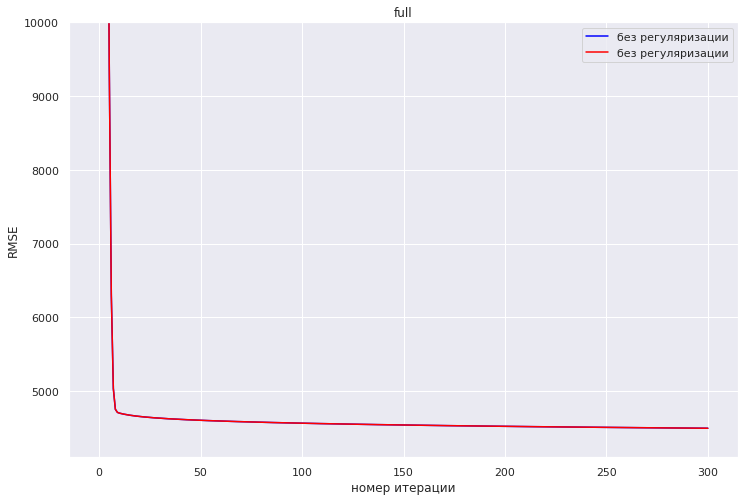

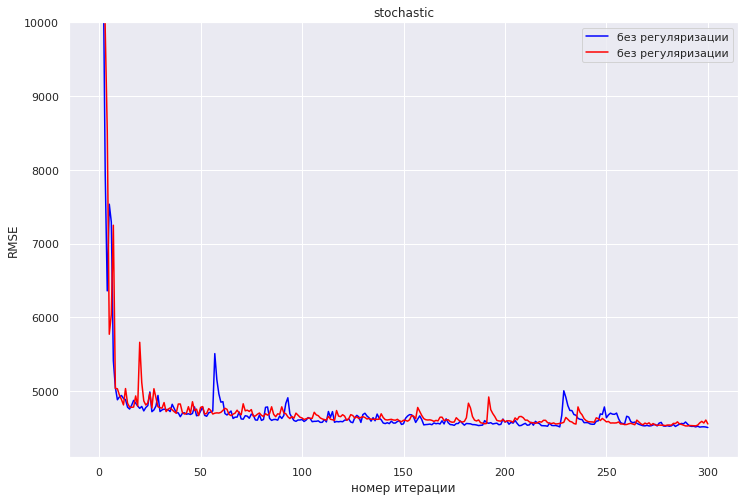

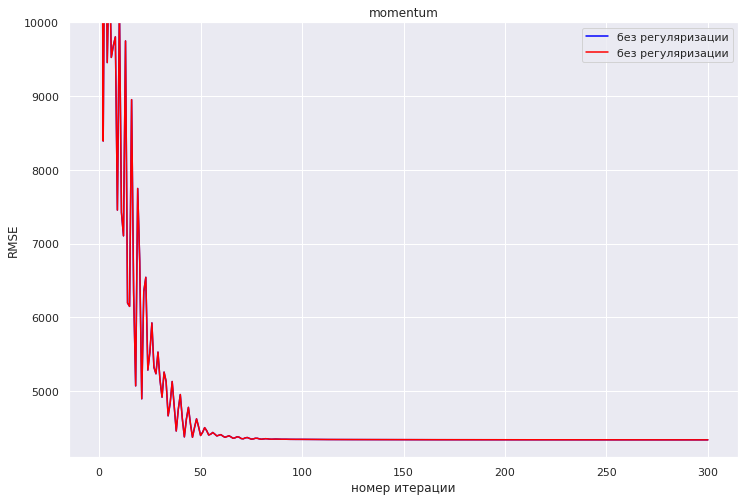

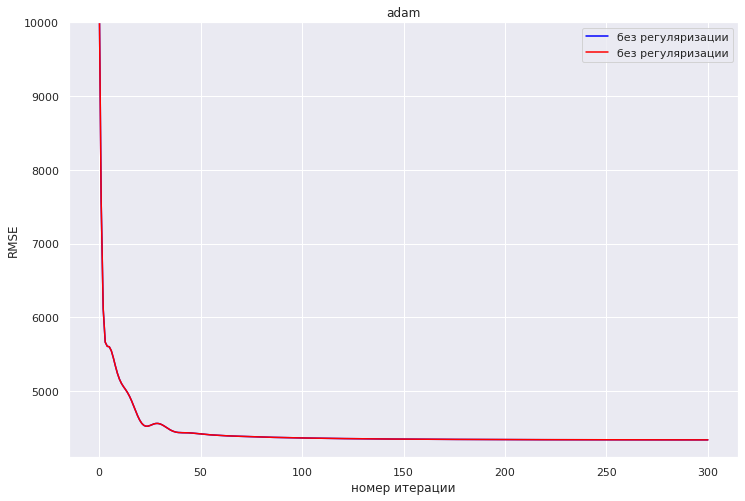

In [51]:
x = range(model.max_iter + 1)
for descent in descent_names:
    plt.figure(figsize=(12, 8))
    plt.plot(x,
             np.sqrt(losses[descent]),
             color='blue',
             label='без регуляризации')
    plt.plot(x,
             np.sqrt(reg_losses[descent]),
             color='red',
             label='без регуляризации')
    plt.ylim(4100, 10000)
    plt.ylabel('RMSE')
    plt.xlabel('номер итерации')
    plt.title(descent)
    plt.legend()
    plt.show()

Поскольку модель в данном случае не склонна к переобучению, то результат с регуляризацией практически не отличается от результата без регуляризации. Это подтверждает тот факт, что лучший коэффициент регуляризации для всех типов градиентного спуска - наименьший из рассмотренных. Отличия есть только при стохастическом градиентном спуске, но они скорее могут объясняться тем, что минимум функции потерь ищем по подмножеству аргументов.

у обычного, стохастического, adam с регуляризацией качество на тестовой выборке хуже, чем без нее

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

`### ваша прогулка тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

##### Метод Amsgrad

\begin{align}
    &m_0 = 0, \quad v_0 = 0,\quad \widehat{m}_{0}=0 ; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{v}_{k+1} = \max{(v_{k + 1}, \widehat{v}_{k})}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}


In [52]:
descent_config = {
    'descent_name': 'amsgrad',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': 1000
    }
}

amsgrad_loss_info = {'loss': np.inf, 'lambda_': 0, 'losses': []}

lambdas = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

In [53]:
print('#' * 15, 'AMSGrad', '#' * 15)
for lambda_ in lambdas:
    descent_config['kwargs']['lambda_'] = lambda_
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train)
    loss = np.sqrt(model.calc_loss(X_val, y_val))
    if loss < amsgrad_loss_info['loss']:
        amsgrad_loss_info['loss'] = loss
        amsgrad_loss_info['lambda_'] = lambda_
        amsgrad_loss_info['losses'] = model.loss_history
    print(f"lambda: {lambda_} loss : {loss:.5f}")

############### AMSGrad ###############
lambda: 0.001 loss : 10841.99252
lambda: 0.01 loss : 10836.18940
lambda: 0.1 loss : 10783.63043
lambda: 1 loss : 10273.65281
lambda: 10.0 loss : 6690.62245
lambda: 100.0 loss : 4642.56643
lambda: 1000.0 loss : 4563.92256


In [54]:
descent_config['kwargs']['lambda_'] = amsgrad_loss_info['lambda_']
model = LinearRegression(descent_config=descent_config)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

train_loss = mean_squared_error(y_train, train_preds, squared=False)
valid_loss = mean_squared_error(y_val, val_preds, squared=False)
test_loss = mean_squared_error(y_test, test_preds, squared=False)

train_metric = r2_score(y_train, train_preds)
valid_metric = r2_score(y_val, val_preds)
test_metric = r2_score(y_test, test_preds)

descent_result.loc['amsgrad', :] = [
    train_loss, valid_loss, test_loss, train_metric, valid_metric, test_metric,
    end - start
]
print('#' * 15, 'AMSGrad', '#' * 15)
print(
    f"train loss: {train_loss:.5f} valid loss : {valid_loss:.5f} test loss {test_loss:.5f}"
)
print(
    f"train metric: {train_metric:.5f} valid metric : {valid_metric:.5f} test metric {test_metric:.5f}"
)

############### AMSGrad ###############
train loss: 4335.57564 valid loss : 4563.92256 test loss 4374.73045
train metric: 0.70633 valid metric : 0.69764 test metric 0.69600


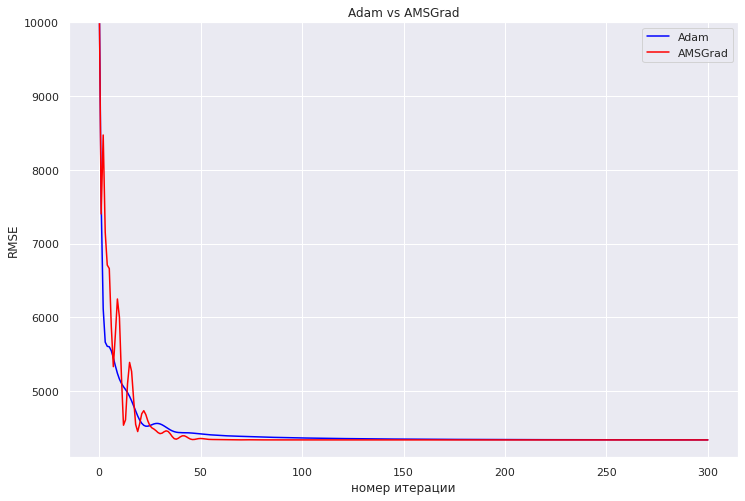

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(x, np.sqrt(losses['adam']), color='blue', label='Adam')
plt.plot(x, np.sqrt(amsgrad_loss_info['losses']), color='red', label='AMSGrad')
plt.ylim(4100, 10000)
plt.ylabel('RMSE')
plt.xlabel('номер итерации')
plt.title('Adam vs AMSGrad')
plt.legend()
plt.show()

In [56]:
descent_result.loc[['adam', 'amsgrad']]

,train_rmse,valid_rmse,test_rmse,train_r2,valid_r2,test_r2,time
adam,4336.621278,4565.554461,4374.447589,0.706187,0.697419,0.696036,9.993143
amsgrad,4335.575642,4563.922556,4374.730452,0.706329,0.697635,0.695996,9.8864


R2 на тестовой выборке лучше у adam на 0.001
Adam сходится плавнее, чем AMSGrad, однако для сходимости требуется большее количество итераций.

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?